### Übung 05 - Partial Fourier Imaging

Die effektivste Methode, um Bewegungsartefakte zu vermeiden, ist die Aufnahmezeit zu reduzieren. Eine Möglichkeit dafür bietet das "Partial Fourier Imaging". Hier wird die hermitesche Symmetrie des k-Raums ausgenutzt, um nur die Hälfte der Datenpunkte aquirieren zu müssen. Trotzdem wird diese Technik nicht oft verwendet. In diesem Notebook soll der Grund dafür ermittelt werden.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from helper import *

In [2]:
# platzieren Sie die Datei "phantom_256x256.npy" im selben Ordner wie dieses Notebook, bevor Sie diese Zelle ausführen
plt.rcParams["figure.figsize"] = (20,10)
kspace = np.load('phantom_256x256.npy')

## Aufgabe 1 - Partial Fourier Imaging

Der k-Raum besitzt eine hermitesche Symmetrie. Das bedeutet er ist bis auf komplexe Konjugation punktsymmetrisch. Mathematisch ausgedrückt gilt also für einen Punkt $M(k_x,k_y)$ im k-Raum, dass
$$
M(k_x,k_y) = M(-k_x,-k_y)^\ast
$$

Überlegen Sie sich zunächst, wie diese hermitesche Symmetrie zustande kommt.
Tipp1: Welchen Einfluss hat die komplexe Konjugation auf die Phase?
Tipp2: Was sagt die Position im k-Raum über den Gradienten aus, der während der Aufnahme geschaltet wurde?

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>

* Einfluss der komplexen Konjugation auf die Phase:
    * Die Phase verändert sich um den Wert Pi

Bei einem k-Raum mit den Dimensionen 256x256 kann die hermitesche Symmetrie bei jeweils einer Zeile und Spalte nicht ausgenutzt werden. Welche?
Löschen Sie diese beiden aus dem k-Raum, sodass der k-Raum also nur noch die Dimensionen 255x255 hat.

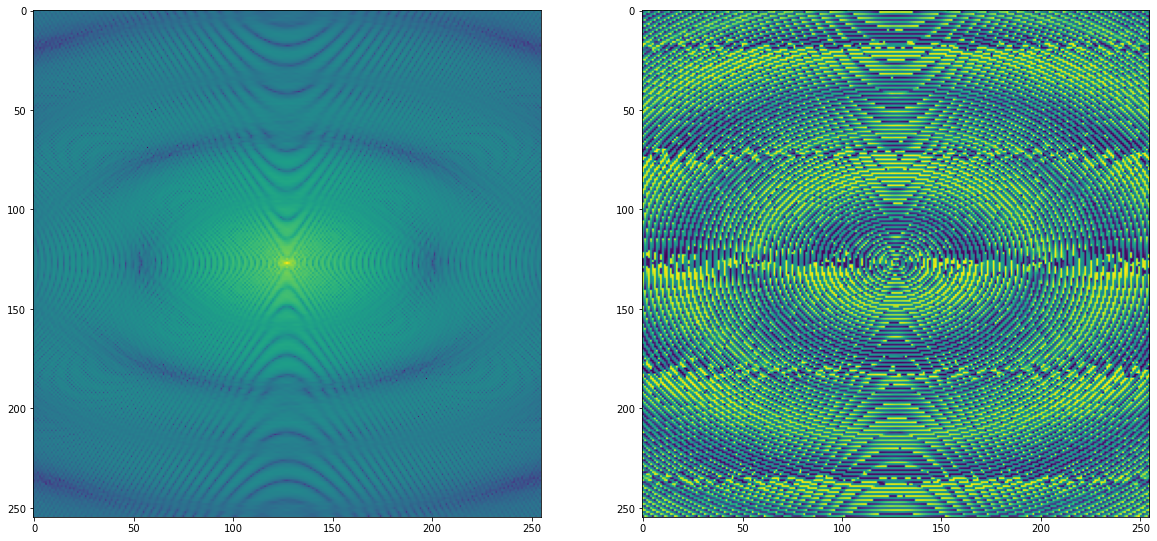

(255, 255)


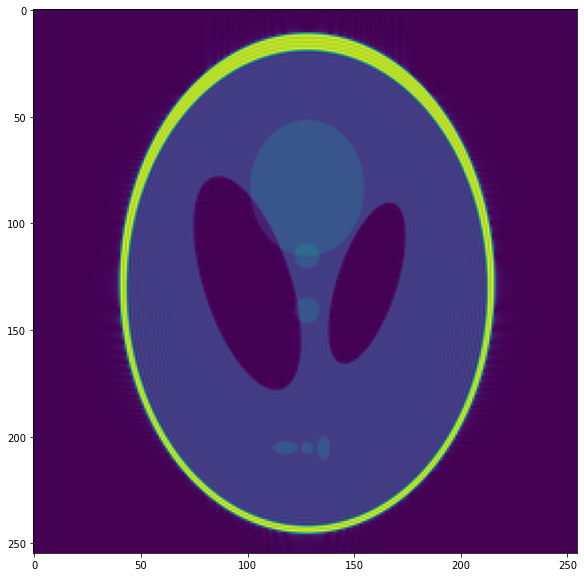

In [11]:
deleted_kspace = np.delete(np.delete(kspace, 0, 0), 0, 1)

visualize_single_kspace(deleted_kspace)
imshow(ifft(deleted_kspace))

print(deleted_kspace.shape)

Verwerfen (auf 0 setzen) Sie exemplarisch die untere Hälte (also 127 Zeilen) des K-Raums und stellen Sie das Ergbnis dar (der Betrag reicht).

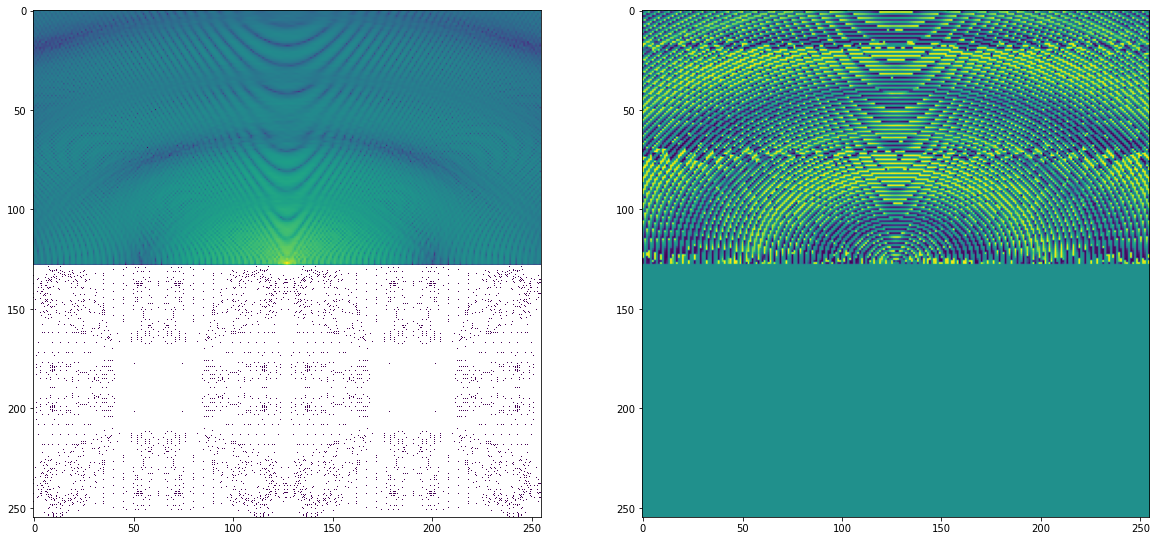

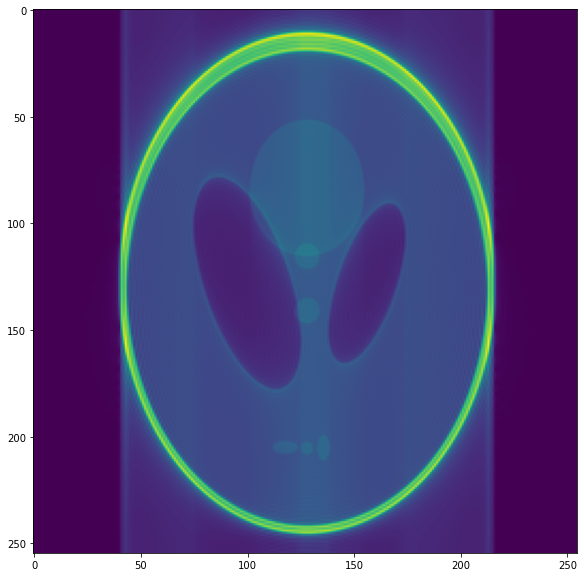

In [12]:
half_zero_kspace = np.copy(deleted_kspace)

half_zero_kspace[-127:, :] = 0

visualize_single_kspace(half_zero_kspace)
imshow(ifft(half_zero_kspace))

Berechnen Sie nun die untere Hälfte des K-Raums ausschließlich unter Verwendung der oberen. Speichern Sie das Ergebnis in einem neuen Array und stellen Sie es dar.

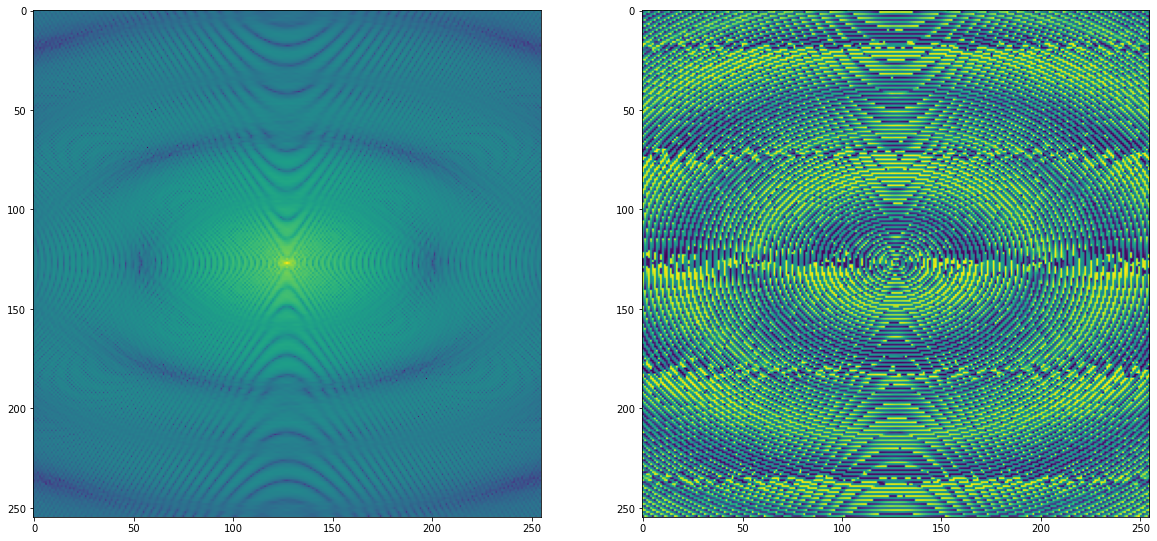

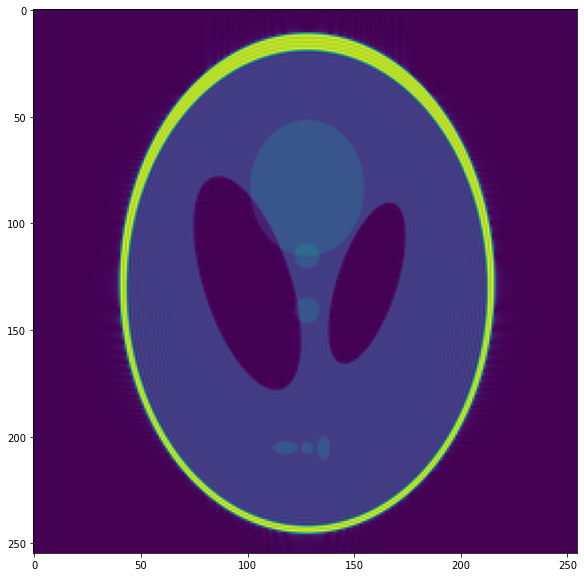

In [21]:
rec_kspace = np.copy(half_zero_kspace)
rec_kspace[-127:, :] = np.conjugate(np.fliplr(half_zero_kspace[126::-1, :]))

visualize_single_kspace(rec_kspace)
imshow(ifft(rec_kspace))

Fügen sie die beiden Häften zu einem heilen K-Raum zusammen und rekonstruieren sie das Bild.

Entspricht dieses Bild dem Original? Prüfen Sie das, indem Sie ein Differenzbild erzeugen.

True


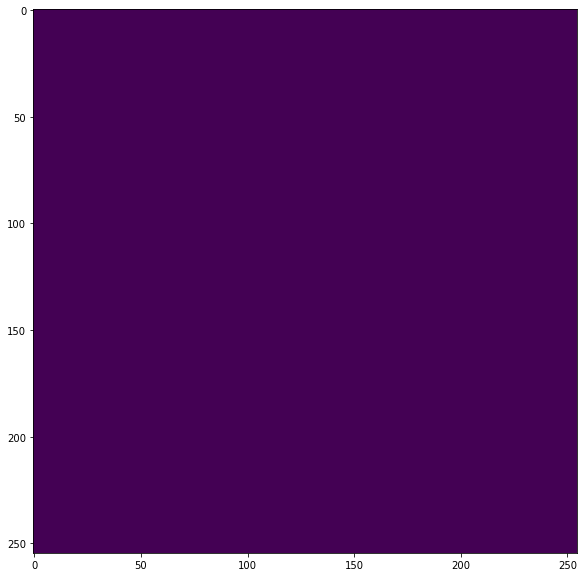

In [23]:
diff_image = ifft(deleted_kspace) - ifft(rec_kspace)
imshow(diff_image)

print(np.all(np.isclose(diff_image, 0)))

## Aufgabe 2 - Phasenfehler

In der Realität werden die aufgenommenen Daten einem gewissen Rauschen unterliegen. Zustäzlich kommen andere Faktoren wie ein nicht ganz homogenes B0-Feld hinzu. Diese Störfaktoren haben Einfluss auf die Phase im Bildraum.
Simulieren Sie eine solche Störung, indem Sie das rekonstruierte Bild in jedem Pixel mit einer normalverteilt zufälligen Phase multiplizieren.

Transformieren Sie das Bild zurück in den k-Raum. Gehen Sie dann mit diesem k-Raum die Schritte aus Aufgabe 1 erneut durch.
Probieren Sie ruhig verschiedene Werte für die Standardabweichung der zufälligen Phase aus.

Tipp 1: Die Funktion `numpy.random.randn` kann hier helfen.

Tipp 2: Rufen Sie sich zunächst in Erinnerung, was die Phase einer komplexen Zahl ist

Wie unterscheidet sich das jetzige vom vorherigen Bild? Wie ist das zu erklären?

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>